# Kernel SVM

In this part we will use Kernel SVM classification algorithm on the same problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('chesscom_games_no_draws.csv')

In [3]:
df.head(3)

,Unnamed: 0,Event,Site,Date,Round,Time Control,Time,Color,Opening move,Opponent,Opponent location,Current Rank,Opponent Rank,Result,Reason,Hour,Previously played that day
0,0,Live Chess,Chess.com,2018.08.15,-,180+2,22:34:39,White,e4,Lillyandmarcus,United States,614,736,Lost,Resignation,22,0
1,1,Live Chess,Chess.com,2018.09.18,-,180+2,15:34:13,White,d4,TheGod1092,United States,741,537,Won,Checkmate,15,0
2,2,Live Chess,Chess.com,2018.09.18,-,180+2,17:28:39,Black,e4,joseinstein,International,666,887,Lost,Resignation,17,1


Creating the "Rank difference" column and dummy variables for color and time control; drop everything else:

In [4]:
df['Rank difference'] = df['Current Rank'] - df['Opponent Rank']
df['Time Control'] = df['Time Control'].apply(lambda x: 0 if x == '300+5' else 1)
color = pd.get_dummies(df['Color'],drop_first=True)
df = pd.concat([df,color],axis=1)

In [5]:
df.drop(['Unnamed: 0','Event','Site','Date','Current Rank','Round','Opponent Rank', 'Time','Color','Hour','Previously played that day','Opening move','Opponent','Opponent location','Reason'],axis=1,inplace=True)

In [6]:
df.head(3)

,Time Control,Result,Rank difference,White
0,1,Lost,-122,1
1,1,Won,204,1
2,1,Lost,-221,0


Make sure there is no missing data:

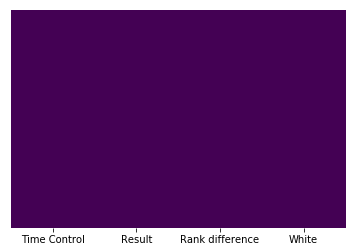

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Selecting our depentent and independent variables and breaking the dataset into test set and training set:

In [8]:
X = df.drop('Result',axis=1)
y = df['Result']

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = pd.DataFrame(X_train)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting classifier to the Training set

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Visualising the results:

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=["Won", "Lost"])
print(cm)
(cm[0][0]+cm[1][1])/(len(y_test))

[[103  62]
 [ 51 122]]


0.665680473372781

# Thank you!